📊 COMPREHENSIVE DATASET ANALYSIS
Total samples: 22,225
Class balance:
label
drowsy       12033
notdrowsy    10192
Name: count, dtype: int64

Face detection rate: 99.19%

📈 EAR ANALYSIS:
Drowsy EAR - Mean: 0.275, Std: 0.109
NotDrowsy EAR - Mean: 0.340, Std: 0.102
EAR Difference: 0.065

👁️ BLINK ANALYSIS:
Drowsy blink rate: 24.26%
NotDrowsy blink rate: 11.57%


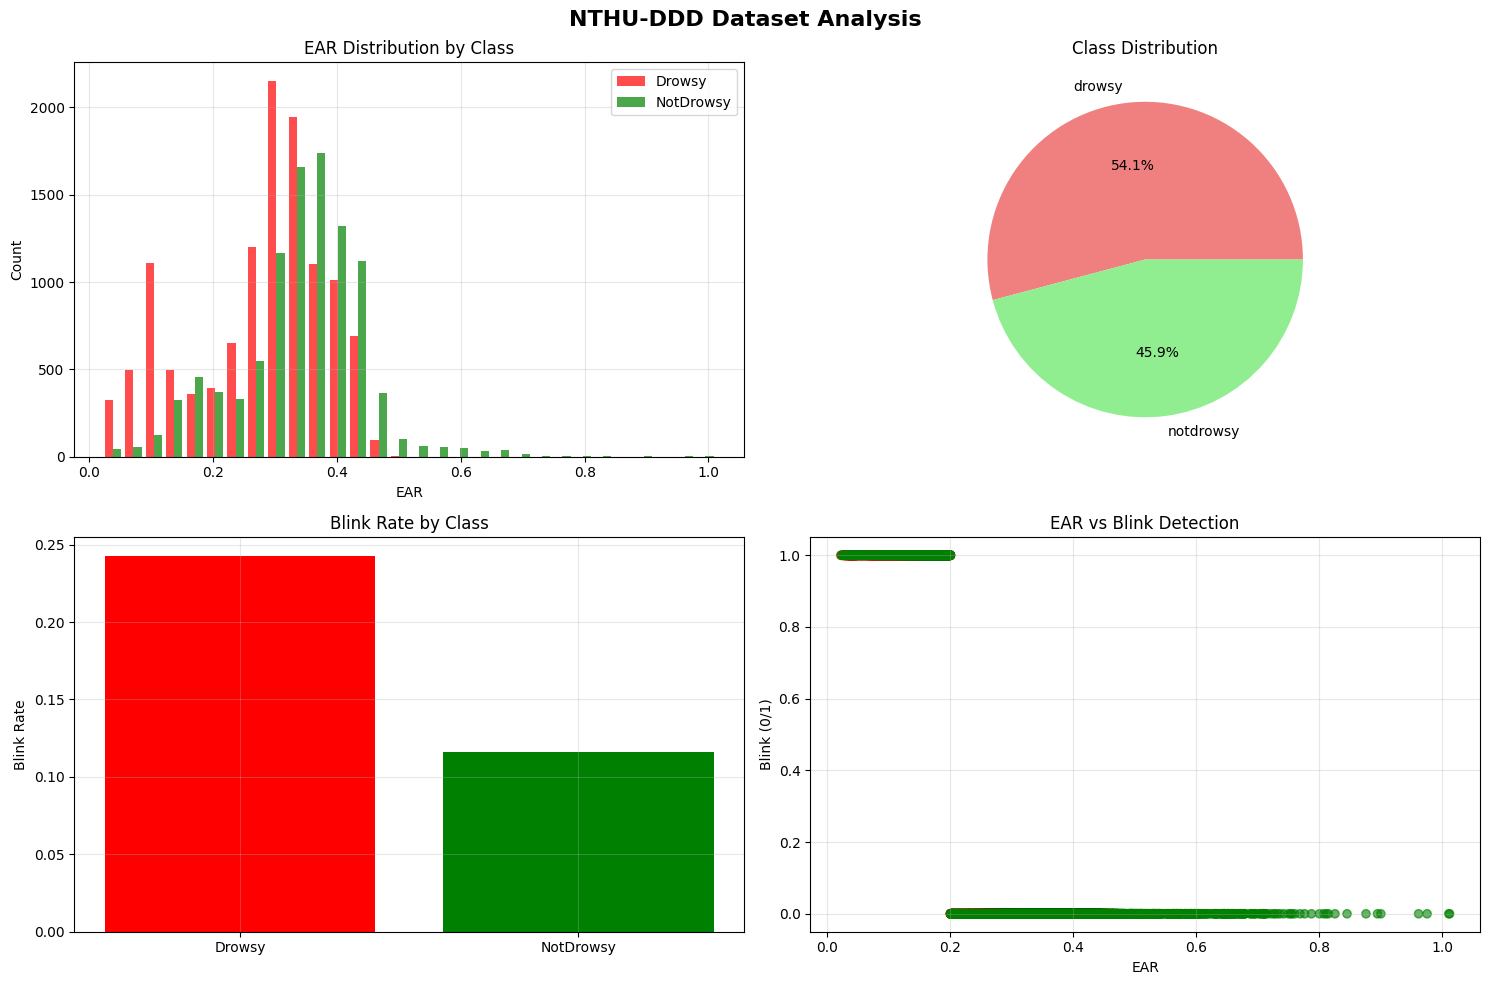


🎯 DATASET READY FOR ML: 22,225 samples


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Load the dataset
df = pd.read_csv(r"C:\Users\Shail\Downloads\neo_cognition\outputs\nthu_features_optimized.csv")

print("📊 COMPREHENSIVE DATASET ANALYSIS")
print("="*50)

# Basic Statistics
print(f"Total samples: {len(df):,}")
print(f"Class balance:")
class_balance = df['label'].value_counts()
print(class_balance)

# Face detection rate
if df['face_detected'].dtype == 'object':
    df['face_detected'] = df['face_detected'].map({'True': True, 'False': False})

face_detection_rate = df['face_detected'].mean()
print(f"\nFace detection rate: {face_detection_rate:.2%}")

# EAR Analysis
if 'avg_ear' in df.columns:
    print(f"\n📈 EAR ANALYSIS:")
    drowsy_ear = df[df['label']=='drowsy']['avg_ear']
    notdrowsy_ear = df[df['label']=='notdrowsy']['avg_ear']
    
    print(f"Drowsy EAR - Mean: {drowsy_ear.mean():.3f}, Std: {drowsy_ear.std():.3f}")
    print(f"NotDrowsy EAR - Mean: {notdrowsy_ear.mean():.3f}, Std: {notdrowsy_ear.std():.3f}")
    print(f"EAR Difference: {abs(drowsy_ear.mean() - notdrowsy_ear.mean()):.3f}")

# Blink Analysis
if 'blink' in df.columns:
    print(f"\n👁️ BLINK ANALYSIS:")
    drowsy_blink_rate = df[df['label']=='drowsy']['blink'].mean()
    notdrowsy_blink_rate = df[df['label']=='notdrowsy']['blink'].mean()
    print(f"Drowsy blink rate: {drowsy_blink_rate:.2%}")
    print(f"NotDrowsy blink rate: {notdrowsy_blink_rate:.2%}")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('NTHU-DDD Dataset Analysis', fontsize=16, fontweight='bold')

# 1. EAR Distribution by Class
if 'avg_ear' in df.columns:
    axes[0,0].hist([drowsy_ear, notdrowsy_ear], bins=30, alpha=0.7, 
                   label=['Drowsy', 'NotDrowsy'], color=['red', 'green'])
    axes[0,0].set_xlabel('EAR')
    axes[0,0].set_ylabel('Count')
    axes[0,0].set_title('EAR Distribution by Class')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

# 2. Class Balance
axes[0,1].pie(class_balance.values, labels=class_balance.index, autopct='%1.1f%%', 
              colors=['lightcoral', 'lightgreen'])
axes[0,1].set_title('Class Distribution')

# 3. Blink Rate by Class
if 'blink' in df.columns:
    blink_rates = [drowsy_blink_rate, notdrowsy_blink_rate]
    axes[1,0].bar(['Drowsy', 'NotDrowsy'], blink_rates, color=['red', 'green'])
    axes[1,0].set_ylabel('Blink Rate')
    axes[1,0].set_title('Blink Rate by Class')
    axes[1,0].grid(True, alpha=0.3)

# 4. EAR vs Blink Scatter
if 'avg_ear' in df.columns and 'blink' in df.columns:
    colors = ['red' if label == 'drowsy' else 'green' for label in df['label']]
    axes[1,1].scatter(df['avg_ear'], df['blink'], c=colors, alpha=0.6)
    axes[1,1].set_xlabel('EAR')
    axes[1,1].set_ylabel('Blink (0/1)')
    axes[1,1].set_title('EAR vs Blink Detection')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 DATASET READY FOR ML: {len(df):,} samples")